<a href="https://colab.research.google.com/github/zack822/Ansible-Add-Apache/blob/master/wsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 167 kB 10.0 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
Reddit Username: Reddit Password: 


It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

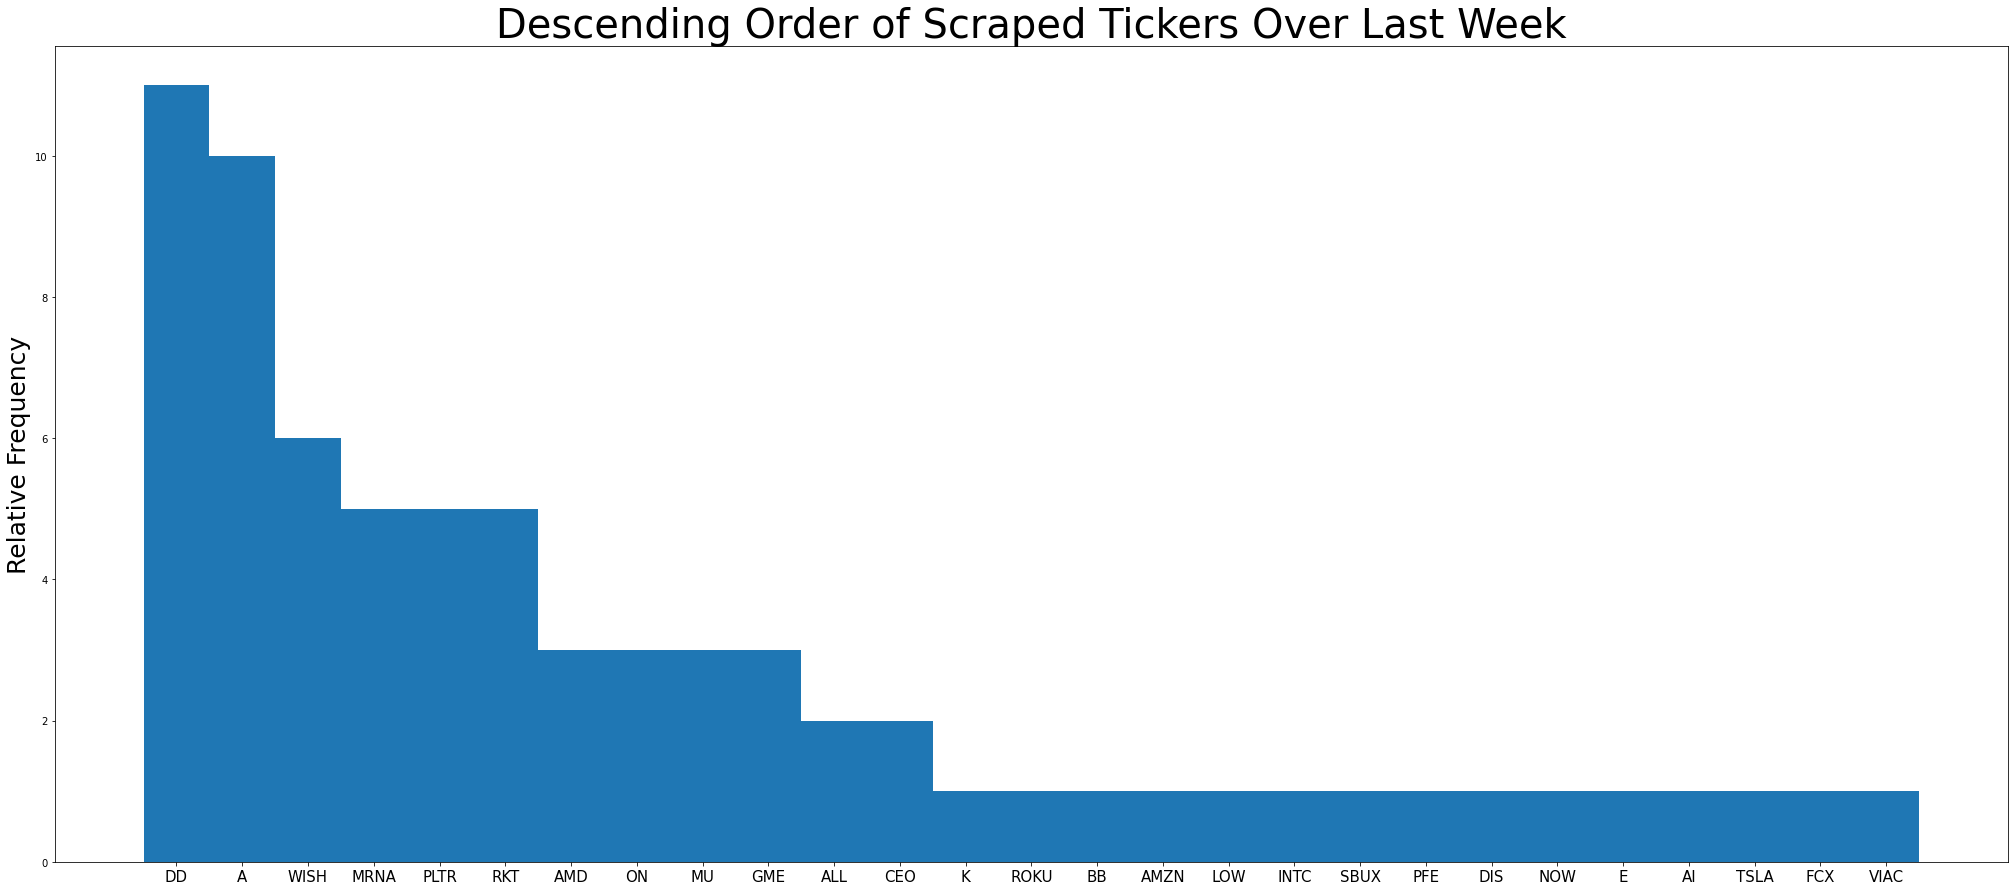

In [1]:
!pip install praw
import praw
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

username = input("Reddit Username: ")
password = input("Reddit Password: ")
reddit = praw.Reddit(client_id='7z62A76xLkfvjA', \
                     client_secret='SuZpyFrbGcpNdk7ljqCtviwtRqbEKg', \
                     user_agent='scraper', \
                     username=username, \
                     password=password)
subreddit = reddit.subreddit('wallstreetbets')

nasdaq = pd.read_csv('https://gdurl.com/tkFs')
nyse = pd.read_csv('https://gdurl.com/mZa6')

#Adjust market cap to minimum $10 million, filter smaller companies out
marketcap = 10000000000
nasdaq = nasdaq[nasdaq['Market Cap'] > marketcap]
nyse = nyse[nyse['Market Cap']>marketcap]

##Create list of tickers (tickerlist) from filtered list above
nasdaq = nasdaq.drop(['Name','Last Sale','Net Change','% Change','Market Cap','Country','IPO Year','Volume','Sector','Industry'],axis=1)
nyse = nyse.drop(['Name','Last Sale','Net Change','% Change','Market Cap','Country','IPO Year','Volume','Sector','Industry'],axis=1)
tickerlist = []
for i in range(0,len(nasdaq)):
  tickerlist.append(nasdaq.iloc[i][0])
for i in range(0,len(nyse)):
  tickerlist.append(nyse.iloc[i][0])

##Collect all the words in submission titles in the top 500 posts of the last week
limit = 500
empty_list = []
for submission in subreddit.top("week",limit=limit):
    #print(submission.title, submission.id)
    string = submission.title
    empty_list.extend(string.split())

##Compare lists to tickerlist and keep those words that are similar
finallist = []
finallist = [str(i) if (str(i) in tickerlist) else 0 for i in empty_list]
finallist = [s for s in finallist if s != 0]

##Count & sort
labels, values = zip(*Counter(finallist).most_common())
values = sorted(values,reverse=True)
indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(35, 15))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels,fontsize=15)
plt.title("Descending Order of Scraped Tickers Over Last Week", fontsize = 40)
plt.ylabel("Relative Frequency",fontsize=25)
plt.show()
